now we are going to use tensor flow to do the same thing

In [85]:
# imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [86]:
# Create the dataset
# Study hours and whether the student passed (0 = fail, 1 = pass)
study_hours = np.array([0.5, 1, 1.5, 2, 3, 3.5, 4.5, 5, 6, 6.5], dtype=np.float32)
labels = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=np.float32)

print(study_hours)
print(labels)


[0.5 1.  1.5 2.  3.  3.5 4.5 5.  6.  6.5]
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [87]:
# Define the model
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [88]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [89]:
# Predict pass probability for 15 hours of study
hours = np.array([[10]])
prob = model.predict(hours)[0][0]
print(f"Probability of passing with 15 hours of study: {prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Probability of passing with 15 hours of study: 0.4625


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


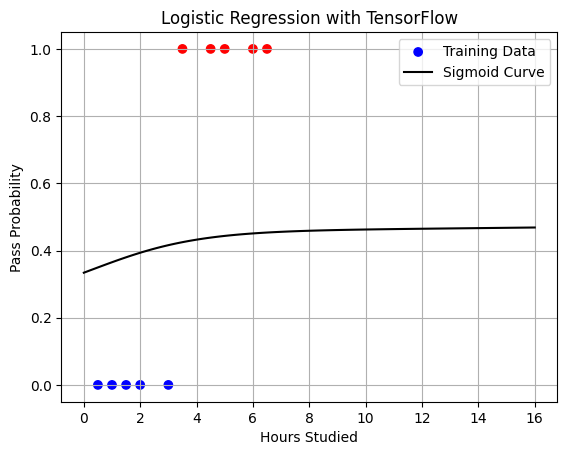

In [90]:
x_vals = np.linspace(0, 16, 100).reshape(-1, 1)
y_vals = model.predict(x_vals)

plt.scatter(study_hours, labels, c=labels, cmap='bwr', label='Training Data')
plt.plot(x_vals, y_vals, color='black', label='Sigmoid Curve')
plt.xlabel("Hours Studied")
plt.ylabel("Pass Probability")
plt.title("Logistic Regression with TensorFlow")
plt.legend()
plt.grid(True)
plt.show()